In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [164]:
# Merging data from each month into one CSV
files = [file for file in os.listdir('./Sales_Data')]
all_data = pd.DataFrame() # to create an emty data frame
for file in files:     
    df = pd.read_csv('./Sales_Data/'+ file)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv('all_data', index = False)

In [165]:
# Reading the file
sales = pd.read_csv('all_data')
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [166]:
# checking the datatypes 
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [167]:
# checking for the missing values
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [168]:
sales.shape

(186850, 6)

In [169]:
# dropping the missing values
sales.dropna(inplace = True)

In [170]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [171]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [172]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [173]:
# checing the unique values of the 'Quantity Ordered' column 
sales['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [174]:
# dropping non numeric values
sales = sales[ sales['Quantity Ordered'] != 'Quantity Ordered']

In [175]:
sales['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [176]:
# making it integer to be able to make statistical analysis 
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)

In [177]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered     int32
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Checking the most ordered Products

In [178]:
products = sales.groupby('Product')['Quantity Ordered'].sum().reset_index()
products

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


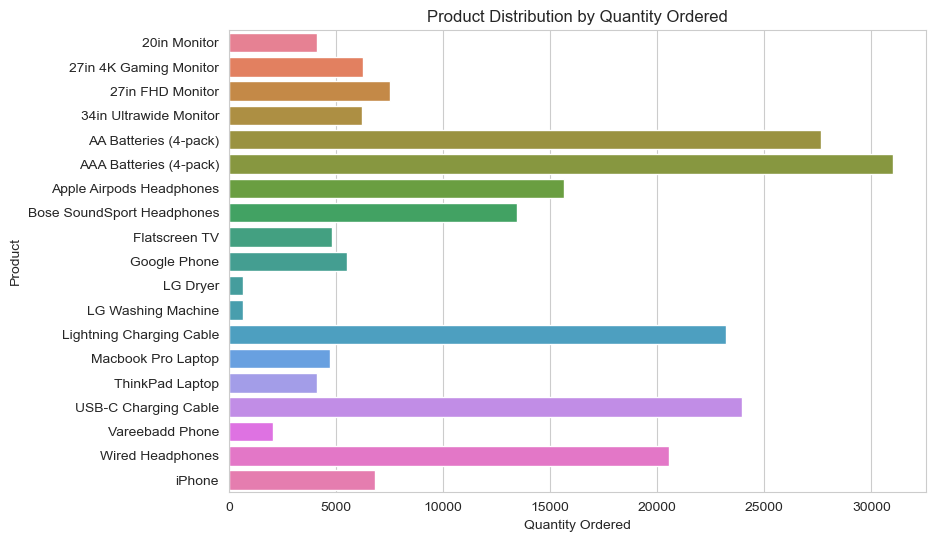

In [265]:
plt.figure(figsize = (9,6))
sns.barplot(data = products, y = products['Product'], x = products['Quantity Ordered'], palette = "husl")
plt.title("Product Distribution by Quantity Ordered")
plt.savefig("Product_Distribution_by_Quantity_Ordered.png")
plt.show()

In [181]:
products[products['Quantity Ordered'] == products['Quantity Ordered'].max()]

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017


In [182]:
sales['Price Each'] = sales['Price Each'].astype(float)

In [183]:
sales.groupby(['Product','Price Each'])['Quantity Ordered'].sum().sort_values(ascending = False)

Product                     Price Each
AAA Batteries (4-pack)      2.99          31017
AA Batteries (4-pack)       3.84          27635
USB-C Charging Cable        11.95         23975
Lightning Charging Cable    14.95         23217
Wired Headphones            11.99         20557
Apple Airpods Headphones    150.00        15661
Bose SoundSport Headphones  99.99         13457
27in FHD Monitor            149.99         7550
iPhone                      700.00         6849
27in 4K Gaming Monitor      389.99         6244
34in Ultrawide Monitor      379.99         6199
Google Phone                600.00         5532
Flatscreen TV               300.00         4819
Macbook Pro Laptop          1700.00        4728
ThinkPad Laptop             999.99         4130
20in Monitor                109.99         4129
Vareebadd Phone             400.00         2068
LG Washing Machine          600.00          666
LG Dryer                    600.00          646
Name: Quantity Ordered, dtype: int32

###### we notice that AAA Batteries (4-pack) has the most Quantity ordered because it has the lowest price 

### Finding the product with the most Revenue generated 

In [184]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [185]:
sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [186]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

C:\Users\sasa_\AppData\Local\Temp\ipykernel_29600\3930949731.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Order Date'] = pd.to_datetime(sales['Order Date'])


In [187]:
sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [188]:
# adding a new column to calculate the revenue 
sales['Revenue'] = sales['Quantity Ordered'] * sales['Price Each']

In [189]:
sales['Revenue'] = sales['Revenue'].astype(float)

In [190]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [191]:
revenue_by_product = sales.groupby('Product')['Revenue'].sum().sort_values(ascending = False).reset_index()

In [192]:
sales.groupby(['Product', 'Price Each'])['Revenue'].sum().sort_values(ascending = False).reset_index()

,Product,Price Each,Revenue
0,Macbook Pro Laptop,1700.00,8037600.00
1,iPhone,700.00,4794300.00
2,ThinkPad Laptop,999.99,4129958.70
3,Google Phone,600.00,3319200.00
4,27in 4K Gaming Monitor,389.99,2435097.56
5,34in Ultrawide Monitor,379.99,2355558.01
6,Apple Airpods Headphones,150.00,2349150.00
7,Flatscreen TV,300.00,1445700.00
8,Bose SoundSport Headphones,99.99,1345565.43
9,27in FHD Monitor,149.99,1132424.50


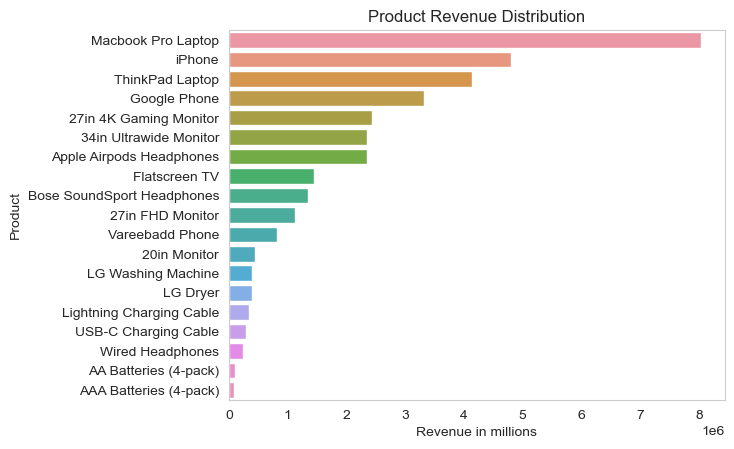

In [246]:
sns.barplot(data = revenue_by_product, y = 'Product', x = 'Revenue')
plt.title("Product Revenue Distribution")
plt.xlabel('Revenue in millions')
sns.set_style('whitegrid')
plt.grid(False)
plt.savefig("Product_Revenue_Distribution.png")
plt.show()

###### We find that Macbook Pro Laptop has the most revenue generated because it has the highest price 

### Finding the highest revenue generated by month and hour

In [194]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [195]:
sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Revenue                    float64
dtype: object

In [196]:
sales['month'] = sales['Order Date'].dt.month
sales['hour'] = sales['Order Date'].dt.hour

In [197]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,month,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,9


In [198]:
revenue_by_month= sales.groupby('month')['Revenue'].sum().reset_index()
revenue_by_month

,month,Revenue
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


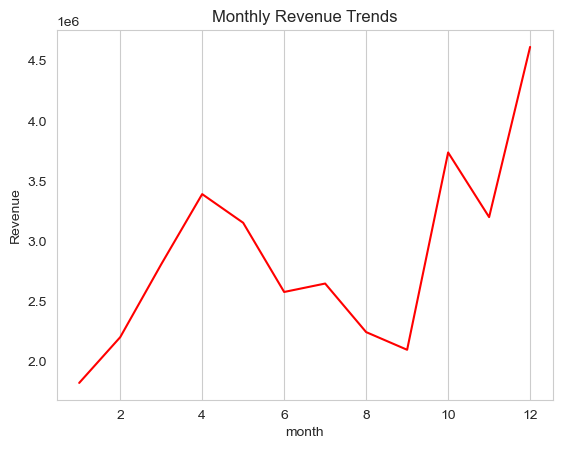

In [247]:
sns.lineplot(data = revenue_by_month, x = 'month', y = 'Revenue', color = 'red')
plt.title('Monthly Revenue Trends')
plt.grid(axis='y')
plt.savefig('Monthly_Revenue_Trends.png')
plt.show()

In [200]:
highest_rev_month = revenue_by_month[revenue_by_month['Revenue'] ==\
                                     revenue_by_month['Revenue'].max()].month.values[0]
highest_rev_month

12

###### we get that the month with the highest revenue is December  

In [201]:
revenue_by_hour= sales.groupby('hour')['Revenue'].sum().reset_index()

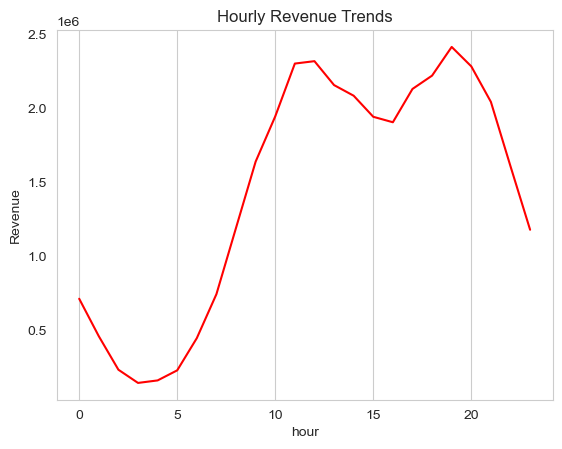

In [248]:
sns.lineplot(data = revenue_by_hour, x = 'hour', y = 'Revenue', color = 'red')
plt.title('Hourly Revenue Trends')
plt.grid(axis='y')
plt.savefig('Hourly_Revenue_Trends.png')
plt.show()

In [203]:
highest_rev_hour = revenue_by_hour[revenue_by_hour['Revenue'] ==\
                                     revenue_by_hour['Revenue'].max()].hour.values[0]
highest_rev_hour

19

###### sales are generated the most at 19 pm

### Finding the highest revenue state

In [204]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,month,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,9


In [205]:
sales['state'] = sales['Purchase Address'].str.split(',', expand = True)[1] + ' (' + \
                 sales['Purchase Address'].str.split(',', expand = True)[2].\
                 str.split(' ', expand = True)[1] + ')'

In [213]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,month,hour,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,8,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,22,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,14,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,14,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,9,Los Angeles (CA)


In [220]:
revenue_by_state= sales.groupby('state')['Revenue'].sum().reset_index()

In [221]:
highest_revenue_by_state = revenue_by_state[revenue_by_state['Revenue'] ==\
                                     revenue_by_state['Revenue'].max()].state.values[0]
highest_revenue_by_state 

' San Francisco (CA)'

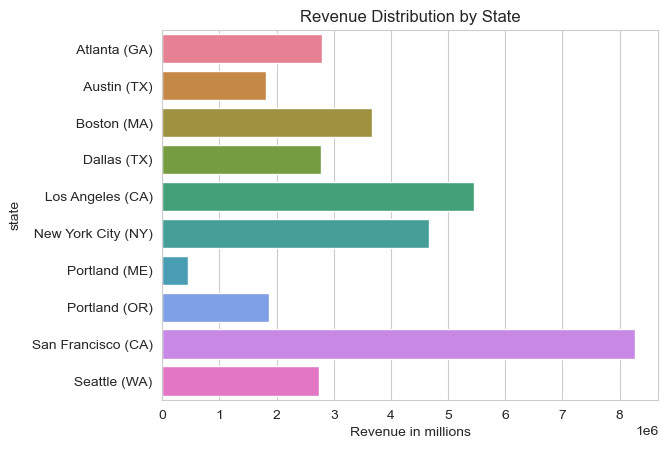

In [249]:
sns.barplot(data = revenue_by_state, y = 'state', x = 'Revenue', palette = "husl")
plt.title("Revenue Distribution by State")

plt.xlabel('Revenue in millions')
sns.set_style('whitegrid')
plt.savefig("Revenue_Distribution_by_State.png")
plt.show()

###### the highest revenue state is San Francisco